In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip3 install tokenizers wandb sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00


In [3]:
!pip3 install transformers huggingface-hub

In [4]:
!pip3 install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [5]:
!pip3 install timesfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of googleapis-common-protos to determine which version is compatible with other requirements. This could take a while.
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.2/440.2 kB 30.8 MB/s et

In [2]:
import os

os.chdir("drive/")
os.chdir('My Drive')
os.chdir('Experiment')
os.chdir('TimeSeries')

In [7]:
# OUTPUT_DIR = './outputs/'
# if not os.path.exists(OUTPUT_DIR):
#     os.makedirs(OUTPUT_DIR)

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Sep 23 12:30:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import pandas as pd
import numpy as np
import timesfm
from datasets import load_dataset

import warnings
warnings.filterwarnings("ignore")

2024-09-23 12:30:19.621805: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Utils

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns


def plot_model_comparison(dataframe: pd.DataFrame) -> None:
    """
    Bar plot comparison between models
    Args:
        dataframe (pd.DataFrame): data with actuals and forecats for both models
    """

    dataframe["Date"] = dataframe["Date"].dt.date

    tide_model = dataframe.rename(columns={"TiDE": "forecast"})
    tide_model["model"] = "TiDE"
    tide_model["MAPE"] = (
        abs(tide_model["visits"] - tide_model["forecast"]) / tide_model["visits"]
    )

    moirai_model = dataframe.rename(columns={"MOIRAI": "forecast"})
    moirai_model["model"] = "MOIRAI"
    moirai_model["MAPE"] = (
        abs(moirai_model["visits"] - moirai_model["forecast"]) / moirai_model["visits"]
    )

    chronos_large_model = dataframe.rename(columns={"Chronos Large": "forecast"})
    chronos_large_model["model"] = "Chronos Large"
    chronos_large_model["MAPE"] = (
        abs(chronos_large_model["visits"] - chronos_large_model["forecast"])
        / chronos_large_model["visits"]
    )

    timesfm_model = dataframe.rename(columns={"TimesFM": "forecast"})
    timesfm_model["model"] = "TimesFM"
    timesfm_model["MAPE"] = (
        abs(timesfm_model["visits"] - timesfm_model["forecast"])
        / timesfm_model["visits"]
    )

    plt.rcParams["figure.figsize"] = (20, 5)
    ax = sns.barplot(
        data=pd.concat([tide_model, chronos_large_model, moirai_model, timesfm_model]),
        x="Date",
        y="MAPE",
        hue="model",
        palette=["#dd4fe4", "#070620", "#8a70be", "#fa7302"],
    )
    plt.title("Comparison between TiDE, Chronos, MOIRAI and TimesFM in Tourism data")
    plt.xticks(rotation=45)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.show()


def plot_actuals_forecast(
    actuals_data: pd.DataFrame, forecast_data: pd.DataFrame, title: str
) -> None:
    """
    Create time series plot actuals vs forecast
    Args:
        actuals_data (pd.DataFrame): actual data
        forecast_data (pd.DataFrame): forecast
        title (str): title for chart
    """

    plt.figure(figsize=(20, 5))
    plt.plot(
        actuals_data["Date"],
        actuals_data["visits"],
        color="royalblue",
        label="historical data",
    )
    plt.plot(
        forecast_data["Date"],
        forecast_data["forecast"],
        color="tomato",
        label="median forecast",
    )
    plt.fill_between(
        forecast_data["Date"],
        forecast_data["forecast_lower"],
        forecast_data["forecast_upper"],
        color="tomato",
        alpha=0.3,
        label="80% prediction interval",
    )
    plt.legend()
    plt.grid()
    plt.title(title)
    plt.show()

In [6]:
TIME_COL = "Date"
TARGET = "visits"
FORECAST_HORIZON = 8 # months
FREQ = "MS"

## Load Data

In [7]:
# load data and exogenous features
df = pd.DataFrame(load_dataset("zaai-ai/time_series_datasets", data_files={'train': 'data.csv'})['train']).drop(columns=['Unnamed: 0'])
df[TIME_COL] = pd.to_datetime(df[TIME_COL])

print(f"Distinct number of time series: {len(df['unique_id'].unique())}")
df.head()

README.md:   0%|          | 0.00/2.94k [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/4.84M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Distinct number of time series: 304


,Date,unique_id,visits,CPI,Inflation_Rate,GDP,static_1,static_2,static_3,static_4
0,1998-01-01,AAAHol,2015.444457,67.4,0.009,3.996740e+11,A,A,A,Hol
1,1998-02-01,AAAHol,514.337600,67.4,0.009,3.996740e+11,A,A,A,Hol
2,1998-03-01,AAAHol,532.097470,67.4,0.009,3.996740e+11,A,A,A,Hol
3,1998-04-01,AAAHol,534.059083,67.4,0.009,3.996740e+11,A,A,A,Hol
4,1998-05-01,AAAHol,505.222272,67.4,0.009,3.996740e+11,A,A,A,Hol


In [8]:
# 8 months to test
train = df[df[TIME_COL] <= (max(df[TIME_COL])-pd.DateOffset(months=FORECAST_HORIZON))]
test = df[df[TIME_COL] > (max(df[TIME_COL])-pd.DateOffset(months=FORECAST_HORIZON))]

print(f"Months for training: {len(train[TIME_COL].unique())} from {min(train[TIME_COL]).date()} to {max(train[TIME_COL]).date()}")
print(f"Months for testing: {len(test[TIME_COL].unique())} from {min(test[TIME_COL]).date()} to {max(test[TIME_COL]).date()}")

Months for training: 220 from 1998-01-01 to 2016-04-01
Months for testing: 8 from 2016-05-01 to 2016-12-01


## TimesFM

In [10]:
tfm = timesfm.TimesFm(
    context_len=512,
    horizon_len=FORECAST_HORIZON,
    input_patch_len=32,
    output_patch_len=128,
    num_layers=20,
    model_dims=1280,
    # backend="cpu",
    backend="cuda",
)
tfm.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

forecast_df = tfm.forecast_on_df(
    inputs=train.loc[:,[TIME_COL, 'unique_id', TARGET]].rename(columns={TIME_COL:'ds'}),
    freq=FREQ,
    value_name=TARGET,
    num_jobs=-1,
)

Multiprocessing context has already been set.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing model weights.


Constructed model weights in 3.14 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 0.66 seconds.
Jitting decoding.
Jitted decoding in 19.57 seconds.
Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


## Plotting

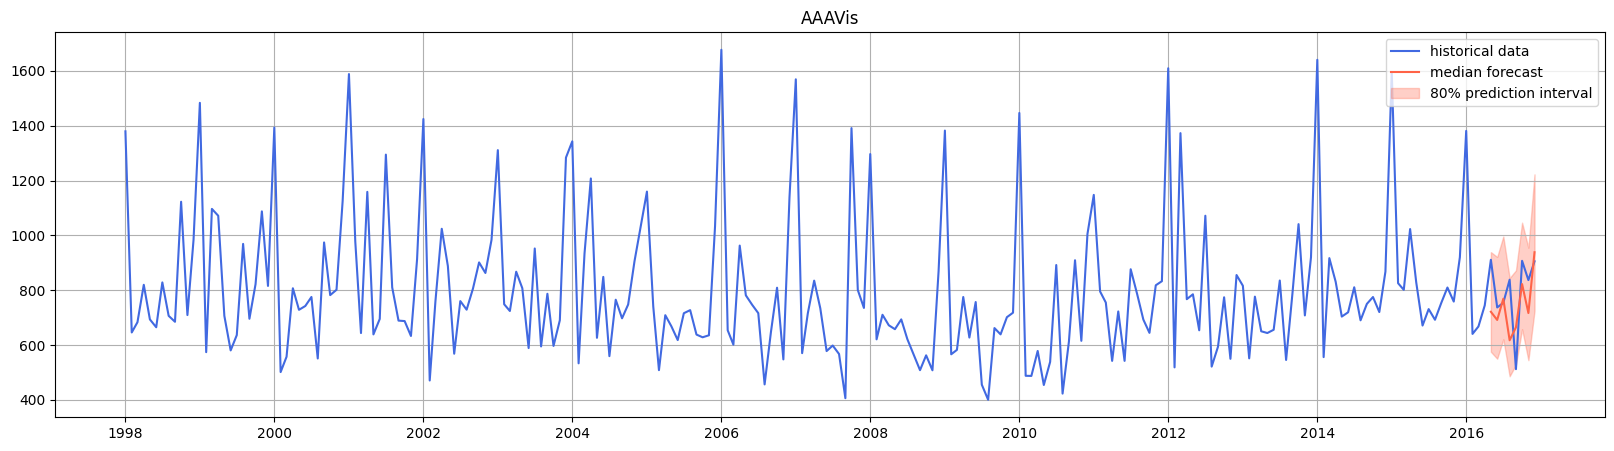

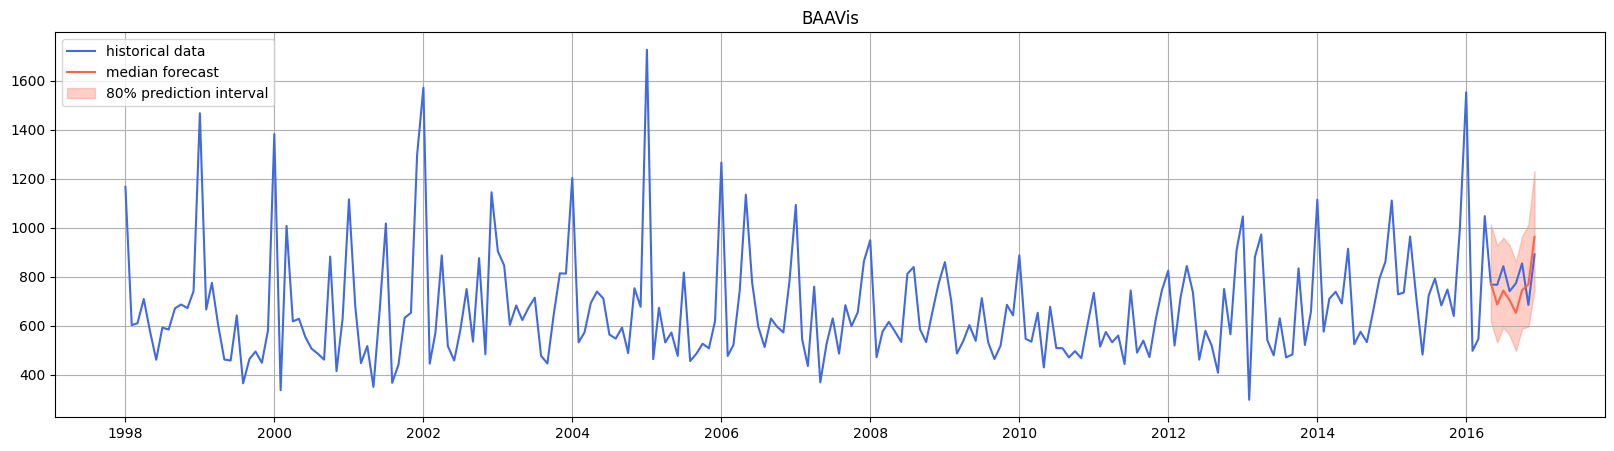

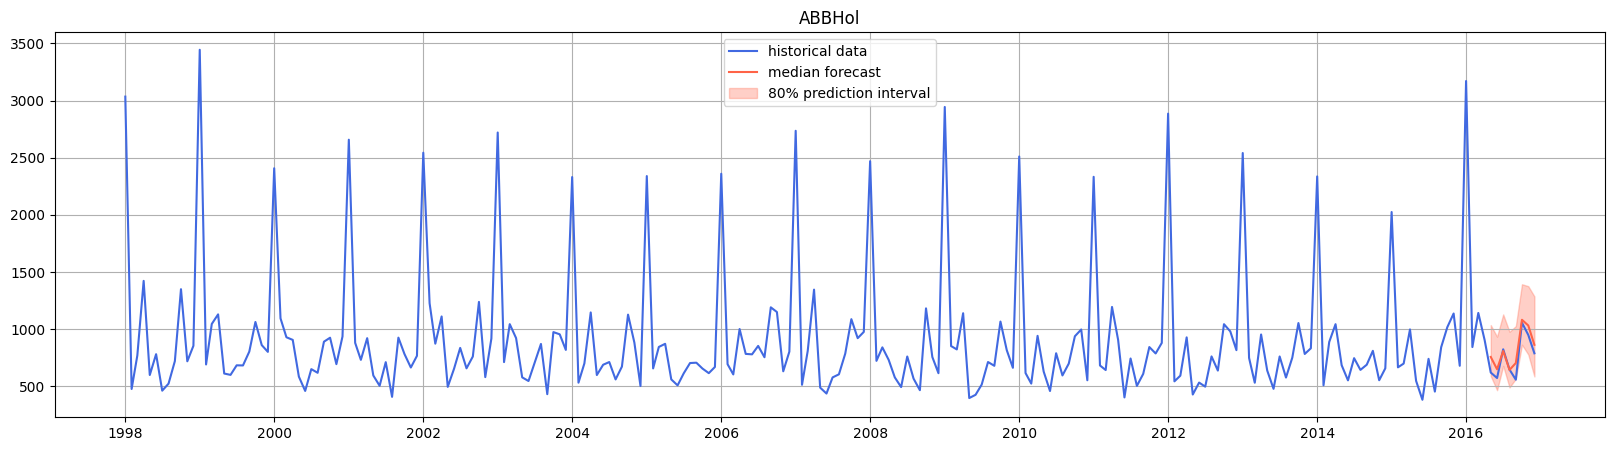

In [11]:
# get series ordered by volume in a descending way
series = test.groupby('unique_id')[TARGET].sum().reset_index().sort_values(by=TARGET, ascending=False)['unique_id'].tolist()

for ts in series[:3]:
    plot_actuals_forecast(df[df["unique_id"]==ts], forecast_df[forecast_df["unique_id"] == ts].rename(columns={'ds':TIME_COL, 'timesfm-q-0.5': 'forecast', 'timesfm-q-0.1': 'forecast_lower', 'timesfm-q-0.9': 'forecast_upper'}), ts)